# **Step 1: Notebook to Create Mobile Phone ML Model**

In [28]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [29]:
# Load dataset as dataframe
mobile_df = pd.read_csv('mobile.csv')
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,2,20,756,2549,9,7,19,No,No,Yes,Medium cost
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,6,905,1988,2631,17,3,7,Yes,Yes,No,High cost
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,6,1263,1716,2603,11,2,9,Yes,Yes,No,High cost
3,615,Yes,2.5,No,0,No,10,0.8,131,6,9,1216,1786,2769,16,8,11,Yes,No,No,High cost
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,14,1208,1212,1411,8,2,15,Yes,Yes,No,Medium cost


In [30]:
# Dropping null values
mobile_df.dropna(inplace = True)
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [31]:
# Distribution of Price Range column
mobile_df['price_range'].value_counts(normalize = True)

price_range
Medium cost       0.25
High cost         0.25
Very high cost    0.25
Low cost          0.25
Name: proportion, dtype: float64

In [32]:
# Output column for prediction
output = mobile_df['price_range'] 

# Input features (excluding year column)
features = mobile_df[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']] 

# One-hot encoding to handle categorical variables
cat_var = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
features_encoded = pd.get_dummies(features, columns = cat_var)

features_encoded.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue_No,blue_Yes,dual_sim_No,dual_sim_Yes,four_g_No,four_g_Yes,three_g_No,three_g_Yes,touch_screen_No,touch_screen_Yes,wifi_No,wifi_Yes
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,True,False,True,False,True,False,True,False,True,False,False,True
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,False,True,False,True,False,True,False,True,False,True,True,False
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,False,True,False,True,False,True,False,True,False,True,True,False
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,False,True,True,False,True,False,False,True,True,False,True,False
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,False,True,True,False,False,True,False,True,False,True,True,False


In [33]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf_dt = DecisionTreeClassifier(random_state = 0)
clf_rf = RandomForestClassifier(random_state = 0)

# Fitting model on training data
clf_dt.fit(train_X, train_y)
clf_rf.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

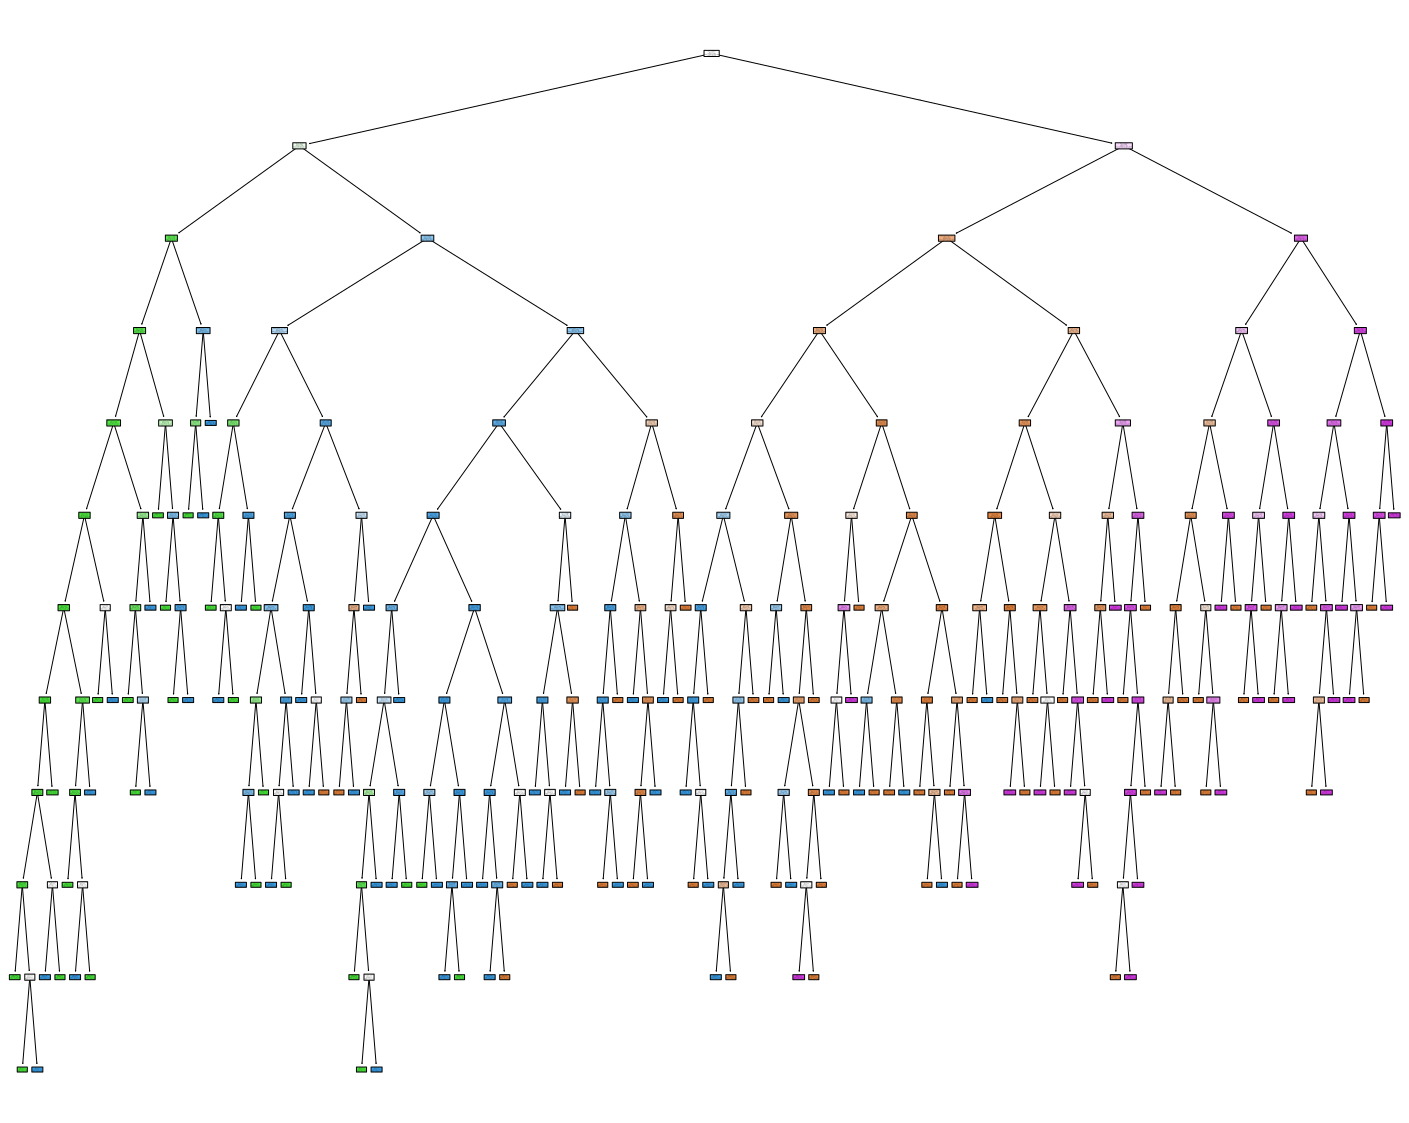

In [34]:
# Visualizing trained decision tree model
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = clf.classes_,
                   filled = True)

# Saving Decision Tree
fig.savefig("dt_visual.svg")

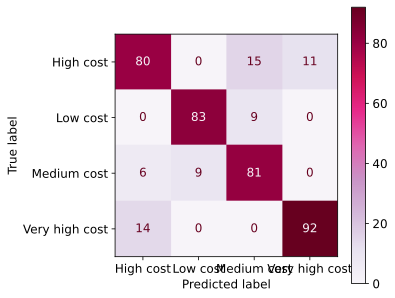

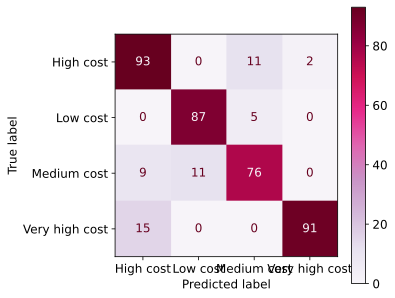

In [35]:
# Predictions on test set
y_pred_dt = clf_dt.predict(test_X)
y_pred_rf = clf_rf.predict(test_X)

# Now generate confusion matrix
cm_dt = confusion_matrix(test_y, y_pred_dt, labels = clf_dt.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix = cm_dt, display_labels = clf_dt.classes_)
cm_rf = confusion_matrix(test_y, y_pred_rf, labels = clf_rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = clf_rf.classes_)

# Specify figure size
fig_dt, ax_dt = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})
fig_rf, ax_rf = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp_dt.plot(cmap = 'PuRd', ax = ax_dt);
disp_rf.plot(cmap = 'PuRd', ax = ax_rf);

# Save confusion matrix
fig_dt.savefig("confusion_mat_dt.svg")
fig_rf.savefig("confusion_mat_rf.svg")

In [36]:
# Generating Classification Report
report_dt = classification_report(test_y, y_pred_dt, output_dict = True)
report_dt_df = pd.DataFrame(report_dt)
report_dt_df
report_rf = classification_report(test_y, y_pred_rf, output_dict = True)
report_rf_df = pd.DataFrame(report_rf)
report_rf_df
# Save the report as a CSV File
report_dt_df.to_csv('class_report_dt.csv') 
report_rf_df.to_csv('class_report_rf.csv') 

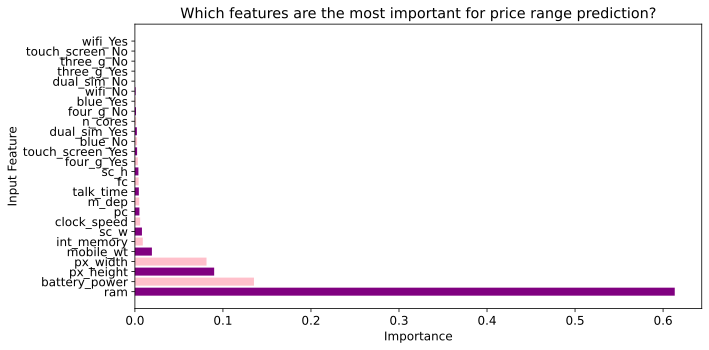

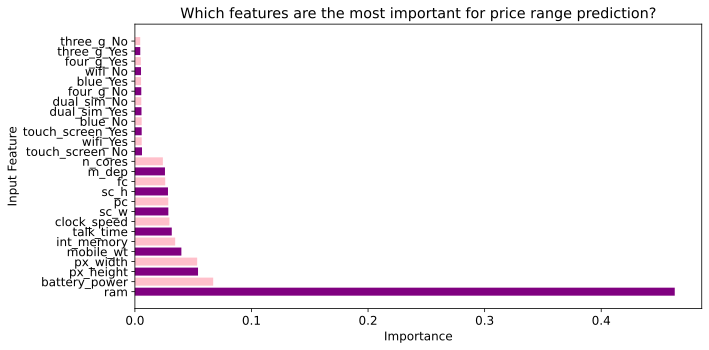

In [37]:
# Storing importance values from the trained model
importance_dt = clf_dt.feature_importances_
importance_rf = clf_rf.feature_importances_

# Storing feature importance as a dataframe
feature_imp_dt = pd.DataFrame(list(zip(train_X.columns, importance_dt)),
               columns = ['Feature', 'Importance'])
feature_imp_rf = pd.DataFrame(list(zip(train_X.columns, importance_rf)),
               columns = ['Feature', 'Importance'])

feature_imp_dt = feature_imp_dt.sort_values('Importance', ascending = False).reset_index(drop = True)
feature_imp_rf = feature_imp_rf.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_dt['Feature'], feature_imp_dt['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for price range prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_dt.svg");

plt.figure(figsize=(10, 5))
plt.barh(feature_imp_rf['Feature'], feature_imp_rf['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for price range prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_rf.svg");

### Save your prediction model and load it later to make predictions (Pickle)

In [38]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_mobile.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf_dt, dt_pickle) 

# Close the file
dt_pickle.close()

In [39]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
rf_pickle = open('random_forest_mobile.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf_rf, rf_pickle) 

# Close the file
rf_pickle.close() 